In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import statistics
import warnings
warnings.filterwarnings('ignore')

In [215]:
df =pd.read_csv('/content/drive/MyDrive/dataset/archive (3).zip')

In [216]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.shape

(7043, 21)

cheack the shape of the data to know the column and rows

In [217]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [218]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

check the column and their datatype

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [224]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
total_charge        11
dtype: int64

to cheack if the column have any missing values

In [225]:
df['total_charge'] = pd.to_numeric(df['TotalCharges'], errors ='coerce')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charge
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15


In [226]:
df2=df.copy()

In [227]:
df2.SeniorCitizen=df2.SeniorCitizen.map({0:'Yes',1:'No'})
df2.SeniorCitizen

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042    Yes
Name: SeniorCitizen, Length: 7043, dtype: object

the seniorcitizen  have just two varaible which are 0 and 1 so we consider the column to be categorical varaible  and convert the value to either yes or no

In [228]:
df.total_charge = df2.total_charge.fillna(df.total_charge.mean())

the column total_charge have a missing value  and this will be fill with the mean

In [229]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
total_charge        0
dtype: int64

univariant  analysis

In [230]:
df2.Churn=df2.Churn.map({'No':0,'Yes':1})


In [231]:
df2.Churn.dtypes

dtype('int64')

In [232]:
df2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,total_charge
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.85
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,1889.50


In [234]:
def add_label(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i])

In [233]:
df2.gender.value_counts()/df2.shape[0]*100

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

 from the calcultion we notice a balance data set for  male and female. the dataset is 1:1 since both the number of male and female are thesame  

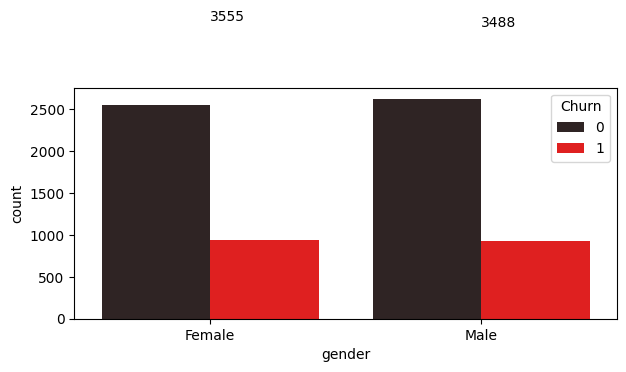

In [235]:
plt.figure(figsize=(7,3))
sns.countplot(x= df2.gender, color ='r', data= df2, hue = 'Churn')
add_label(df2.gender.value_counts().index,df2.gender.value_counts().values)


In [236]:
df2.SeniorCitizen.value_counts()/df2.shape[0]*100

Yes    83.785319
No     16.214681
Name: SeniorCitizen, dtype: float64

84% of the customer are senoircitizen while 16% are not seniorcitizen.those without Seniorcitizen are likely to churn beause of the high percentage of the churn

<Axes: xlabel='SeniorCitizen', ylabel='count'>

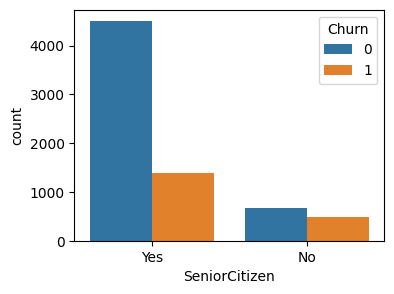

In [237]:
plt.figure(figsize=(4,3))
#sns.barplot(x=df2.SeniorCitizen.value_counts().index,y=df2.SeniorCitizen.value_counts().values)
sns.countplot(data= df2,x= df2.SeniorCitizen, hue ='Churn')

<Axes: xlabel='Partner', ylabel='count'>

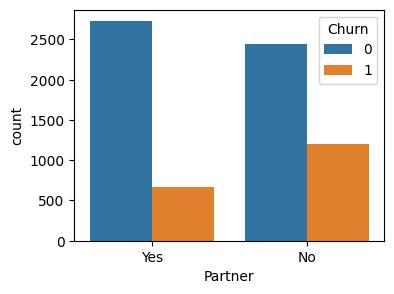

In [238]:
df2.Partner.value_counts()/(df2.shape[0])*100
plt.figure(figsize=(4,3))
#sns.barplot(x=df2.Partner.value_counts().index,y=df2.Partner.value_counts().values,hue ='Churn')
sns.countplot(data= df2,x= df2.Partner, hue ='Churn')


customer  without partner  are 33% more likely to churn compare to customer with  Partner which are 20%

In [239]:
df2.Dependents.value_counts()/df2.shape[0]*100

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

70% of the customer have no dependent comapared to 30% who have dependent . more customer with no dependant are likely to churn

<Axes: xlabel='Dependents', ylabel='count'>

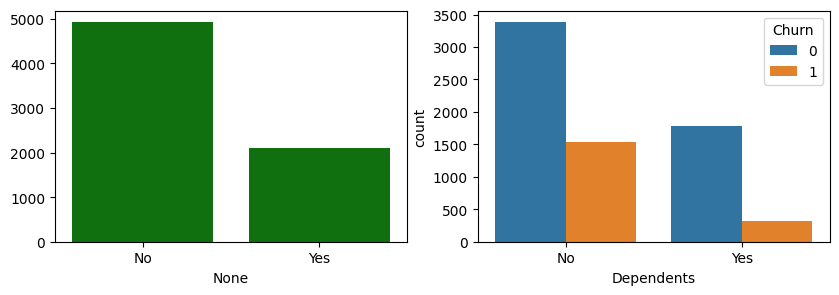

In [240]:
df2.Dependents.value_counts()/(df2.shape[0])*100
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.Dependents.value_counts().index,y=df2.Dependents.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.Dependents, hue ='Churn')



In [241]:
df2.PhoneService.value_counts()/df2.shape[0]*100

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

90% of the customer have phone service  while 9% does not have phone service.it is more likely that customer with   phoneserviec are more likely to churn

<Axes: xlabel='PhoneService', ylabel='count'>

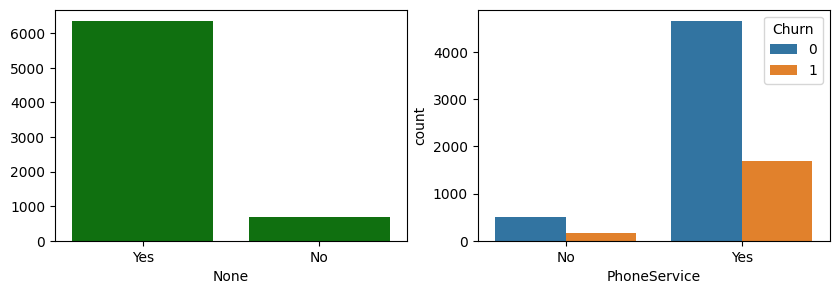

In [242]:
df2.PhoneService.value_counts()/(df2.shape[0])*100
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.PhoneService.value_counts().index,y=df2.PhoneService.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.PhoneService, hue ='Churn')

In [243]:
df2.MultipleLines.value_counts()/df2.shape[0]*100

No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

Text(0.5, 0, 'customer')

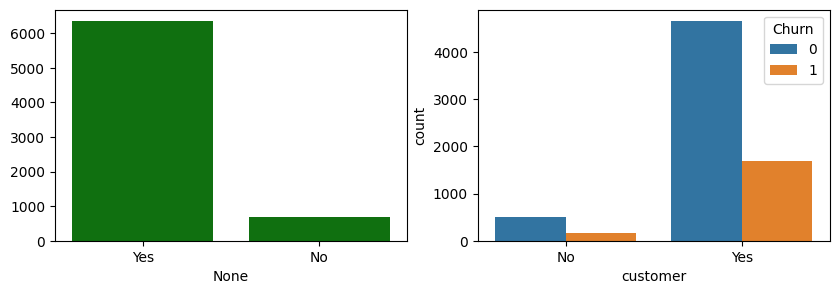

In [244]:
df2.MultipleLines.value_counts()/(df2.shape[0])*100
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.PhoneService.value_counts().index,y=df2.PhoneService.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.PhoneService, hue ='Churn')
plt.ylabel('count')
plt.xlabel('customer')

48% of customer have  no multiple line, 40% have multiple lione wile the rest 9% have no network service.customer with no multiline are more likely to churn  comapred to those that have alternative to other line    

In [245]:
df2.InternetService.value_counts()/df2.shape[0]*100

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

Text(0.5, 0, 'customer')

<Figure size 400x300 with 0 Axes>

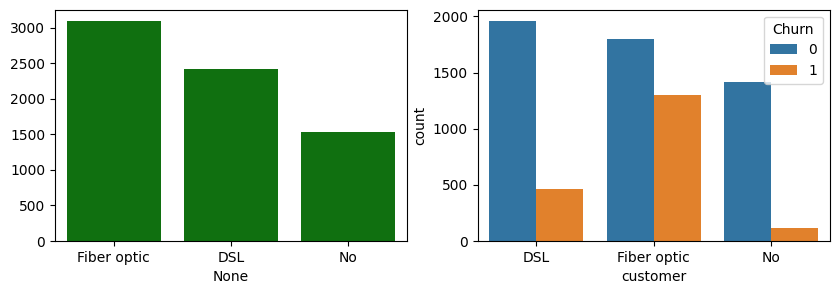

In [246]:
plt.figure(figsize=(4,3))
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.InternetService.value_counts().index,y=df2.InternetService.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.InternetService, hue ='Churn')
plt.ylabel('count')
plt.xlabel('customer')

In [247]:
df2.OnlineSecurity.value_counts()/df2.shape[0]*100

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

Text(0.5, 0, 'customer')

<Figure size 400x300 with 0 Axes>

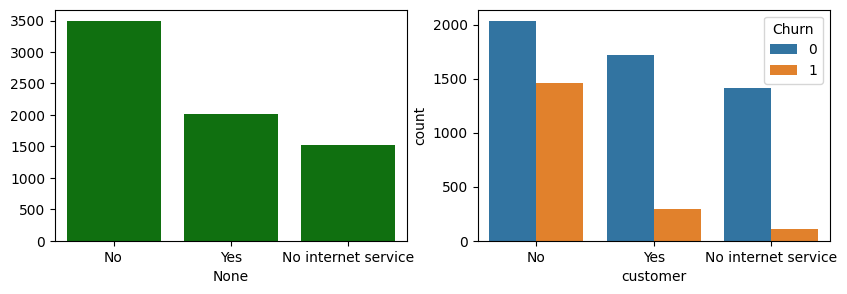

In [248]:
plt.figure(figsize=(4,3))
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.OnlineSecurity.value_counts().index,y=df2.OnlineSecurity.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.OnlineSecurity, hue ='Churn')
plt.ylabel('count')
plt.xlabel('customer')

customer that have no onlineservice are more likely to churn

In [249]:
(df2.DeviceProtection.value_counts()/df2.shape[0]*100).sort_values(ascending =False)

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

Text(0.5, 0, 'customer')

<Figure size 400x300 with 0 Axes>

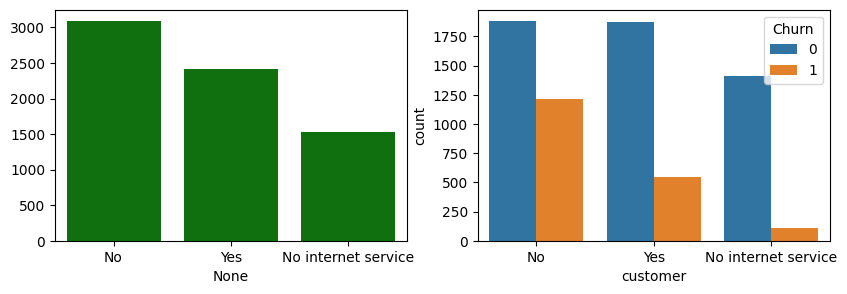

In [250]:
plt.figure(figsize=(4,3))
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.DeviceProtection.value_counts().index,y=df2.DeviceProtection.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.DeviceProtection, hue ='Churn')
plt.ylabel('count')
plt.xlabel('customer')

it appear that customer with  no device proctection are more likely to churn follow by  customer with device protection

In [251]:
df2.TechSupport.value_counts()/df2.shape[0]*100

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

Text(0.5, 0, 'Techsupport')

<Figure size 400x300 with 0 Axes>

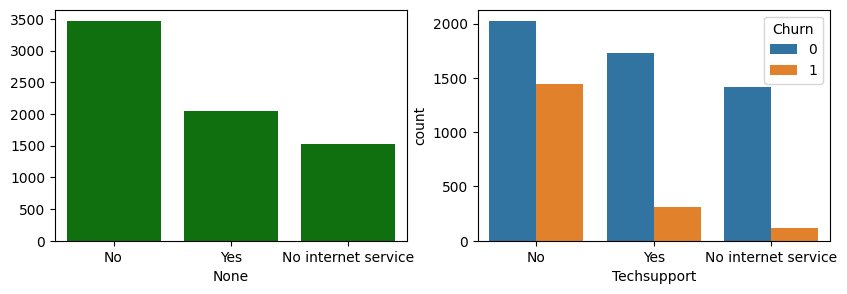

In [252]:
plt.figure(figsize=(4,3))
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.TechSupport.value_counts().index,y=df2.TechSupport.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.TechSupport, hue ='Churn')
plt.ylabel('count')
plt.xlabel('Techsupport')

customer with no tech support are likely to churn  with a high percentage of 41% compared to customer with tech support

In [253]:
df2.StreamingTV.value_counts()/df2.shape[0]*100

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64

Text(0.5, 0, 'StreamingTV')

<Figure size 400x300 with 0 Axes>

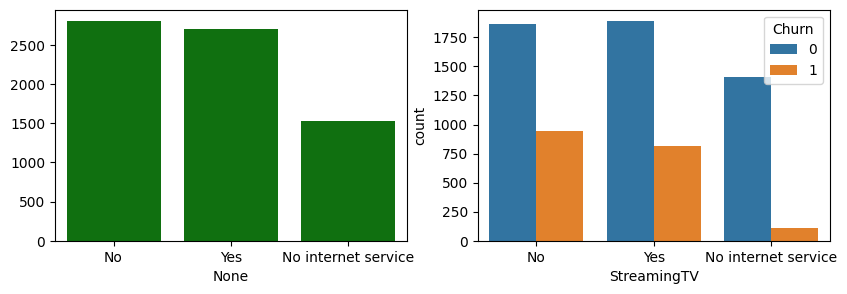

In [254]:
plt.figure(figsize=(4,3))
fig,ax=plt.subplots(1,2,figsize=(10,3))
sns.barplot(x=df2.StreamingTV.value_counts().index,y=df2.StreamingTV.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.StreamingTV, hue ='Churn')
plt.ylabel('count')
plt.xlabel('StreamingTV')

customer  with no streming a like to churn  compared to customer that have no internet service

In [255]:
df2.StreamingMovies.value_counts()/df2.shape[0]*100

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

Text(0.5, 0, 'StreamingMovies')

<Figure size 600x300 with 0 Axes>

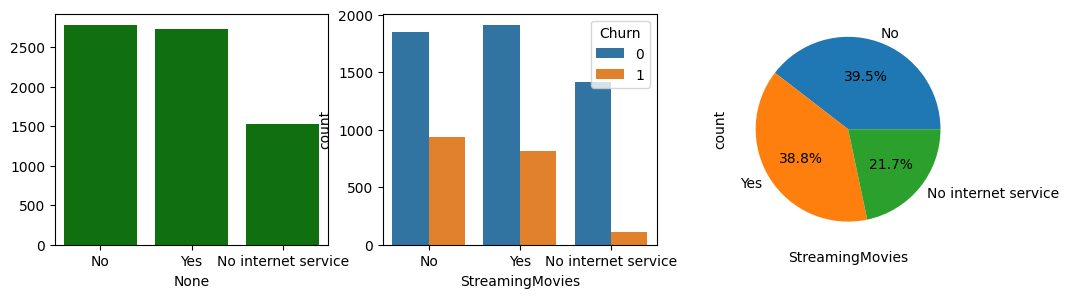

In [256]:
plt.figure(figsize=(6,3))
fig,ax=plt.subplots(1,3,figsize=(12,3))
sns.barplot(x=df2.StreamingMovies.value_counts().index,y=df2.StreamingMovies.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.StreamingMovies, hue ='Churn', ax=ax[1])
(df2.StreamingMovies.value_counts()).plot(kind='pie', labels=df2.StreamingMovies.value_counts().index,autopct= '%1.1f%%')
plt.ylabel('count')
plt.xlabel('StreamingMovies')

customer with no streamingmovie  are likely to churn with a 33% chnace of churning followed by customer with streamingmovie

In [257]:
df2.Contract.value_counts()/df2.shape[0]*100

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

Text(0.5, 0, 'Contract')

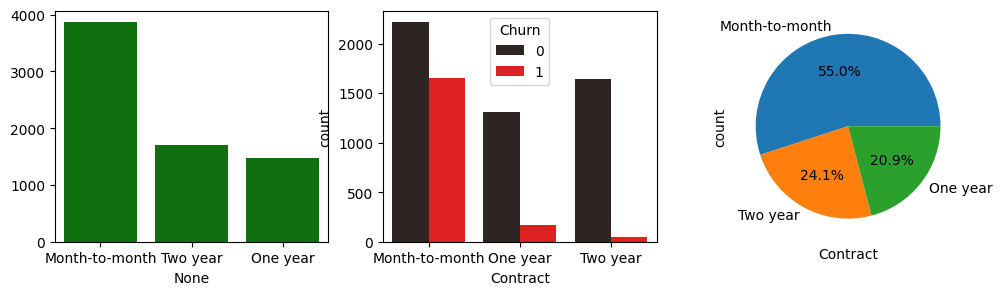

In [258]:

fig,ax=plt.subplots(1,3,figsize=(12,3))
sns.barplot(x=df2.Contract.value_counts().index,y=df2.Contract.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.Contract, hue ='Churn', ax=ax[1], color ='r')
(df2.Contract.value_counts()).plot(kind='pie', labels=df2.Contract.value_counts().index,autopct= '%1.1f%%')
plt.ylabel('count')
plt.xlabel('Contract')

it appear that customer with one month subscrition are more likely to churn follow by customer with one year contract with the company

In [259]:
df2.PaperlessBilling.value_counts()/len(df2.PaperlessBilling)*100

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

Text(0.5, 0, 'PaperlessBilling')

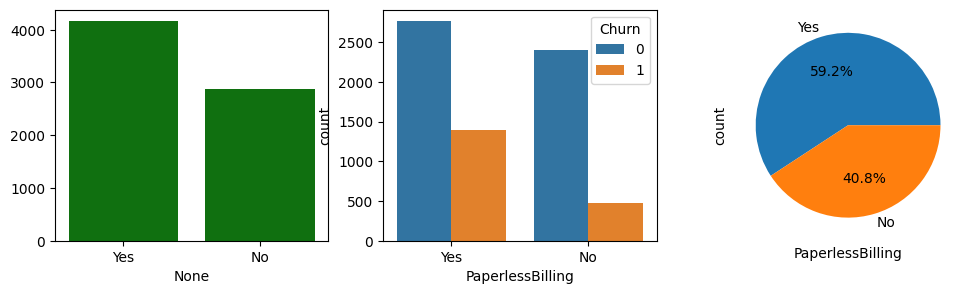

In [260]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
sns.barplot(x=df2.PaperlessBilling.value_counts().index,y=df2.PaperlessBilling.value_counts().values, color ='g', ax=ax[0])
sns.countplot(data= df2,x= df2.PaperlessBilling, hue ='Churn', ax=ax[1])
(df2.PaperlessBilling.value_counts()).plot(kind='pie', labels=df2.PaperlessBilling.value_counts().index,autopct= '%1.1f%%')
plt.ylabel('count')
plt.xlabel('PaperlessBilling')

In [261]:
df2.PaymentMethod.value_counts()/len(df2.PaymentMethod)*100

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

Text(0.5, 0, 'PaymentMethod')

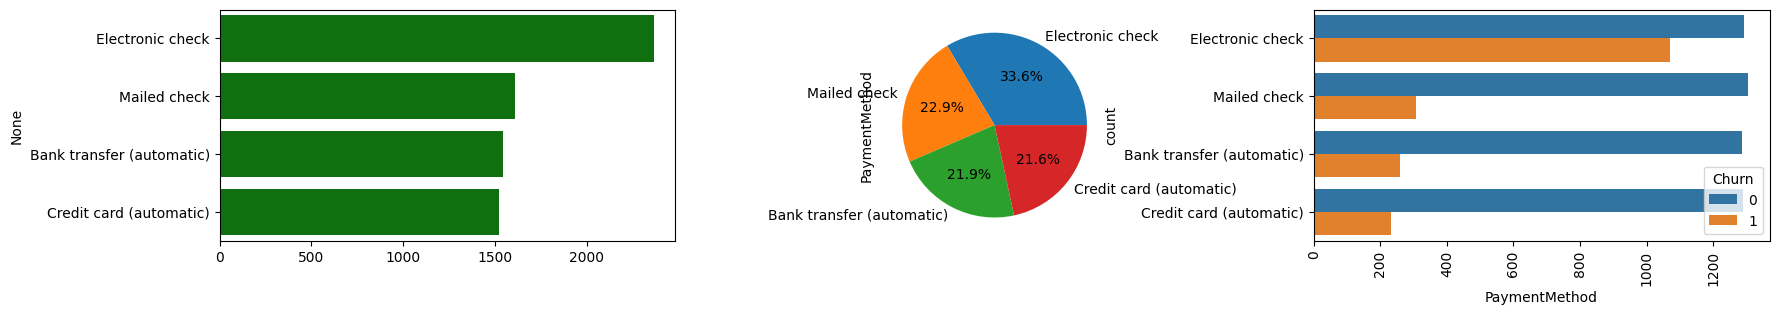

In [262]:
fig,ax=plt.subplots(1,3,figsize=(20,3))
sns.barplot(y=df2.PaymentMethod.value_counts().index,x=df2.PaymentMethod.value_counts().values, color ='g', ax=ax[0])
plt.xticks(rotation=90)
sns.countplot(data= df2,y= df2.PaymentMethod, hue ='Churn', )
(df2.PaymentMethod.value_counts()).plot(kind='pie', labels=df2.PaymentMethod.value_counts().index,autopct= '%1.1f%%', ax=ax[1])
plt.ylabel('count')
plt.xlabel('PaymentMethod')

it appear that customer with that made payement through electric check are likelybto churn follow by cutsomer that make paymnet through  check  are more likely to churn

In [263]:
pd.crosstab(df2.PaymentMethod,df2.Churn)

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [264]:
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-72']
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 72]
df2['tenure_group'] = pd.cut(df2.tenure, bins=bin_edges, labels=bin_labels)
df2['tenure_group'].value_counts()/len(df2.tenure)*100
pd.crosstab(df2.tenure_group, df2.Churn)



Churn,0,1
tenure_group,,
0-10,991,968
11-20,625,283
21-30,589,174
31-40,504,141
41-50,537,115
51-60,603,95
61-70,794,81
71-72,520,12


 It appear hat those with a tenure elongation from 0-10 are more like the churn  and let look at the chart to get a clearer picture of the visualization. from the visualization we notice that customer  that fall within the tenure of 0-10 are morely to churn


Text(0.5, 0, 'tenure_group')

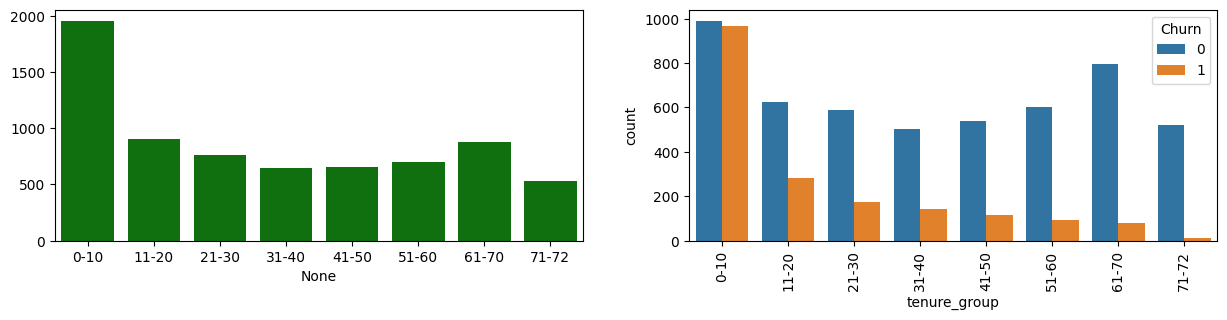

In [268]:
fig,ax=plt.subplots(1,2,figsize=(15,3))
sns.barplot(x=df2.tenure_group.value_counts().index,y=df2.tenure_group.value_counts().values, color ='g', ax=ax[0])
plt.xticks(rotation=90)
sns.countplot(data= df2,x= df2.tenure_group, hue ='Churn', )
plt.ylabel('count')
plt.xlabel('tenure_group')

<Axes: >

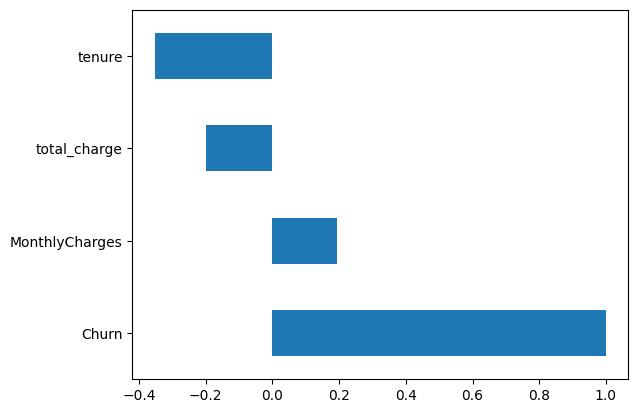

In [269]:
df2.corr()['Churn'].sort_values(ascending=False).plot(kind ='barh')


univariant  numerical analysis

it appear that the monthlycharges and the total-charge are positive correlated  which mean an increase in monthly charge will increase the total charge

<Axes: xlabel='MonthlyCharges', ylabel='total_charge'>

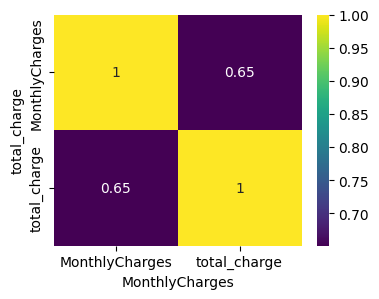

In [ ]:
df2[['MonthlyCharges','total_charge']].corr()
plt.figure(figsize=(4,3))
sns.heatmap(data=df2[['MonthlyCharges','total_charge']].corr(), cmap='viridis', annot =True,)
sns.regplot(data=df2,x='MonthlyCharges', y='total_charge')

In [270]:
df3= df2[df2.Churn==0] # # dataframe of  customer that are active
df4= df2[df2.Churn==1]# dataframe of customer that have churn


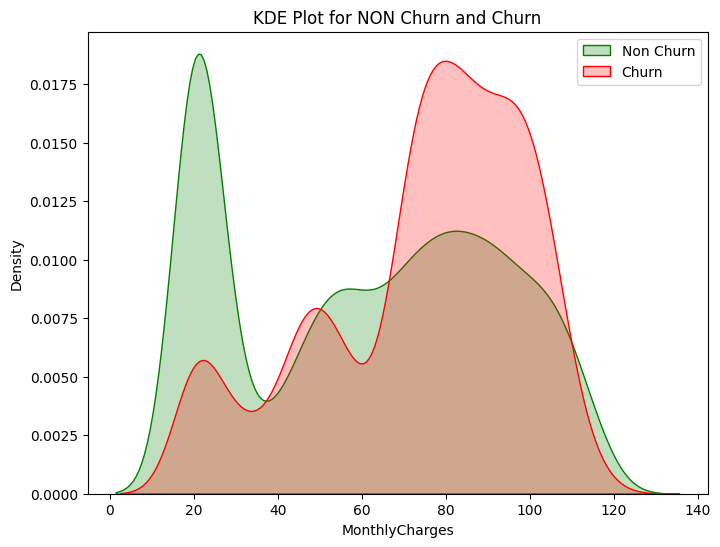

In [271]:
plt.figure(figsize=(8, 6))

# Plot KDE plot for data1
sns.kdeplot(data=df3['MonthlyCharges'], label='Non Churn', shade=True,color='g')

# Plot KDE plot for data2 on the same axis
sns.kdeplot(data=df4['MonthlyCharges'], label='Churn', shade=True, color ='r')

# Set title and legend
plt.title('KDE Plot for NON Churn and Churn')
plt.legend()

# Show plot
plt.show()

from the graph it appear that churn rate is very high when the monthly charges is vey high and  and non chun is very high when the monthly charge are very low  . so we can conclude that the higer the  monthly charges on the cudtomer the higer the chnage of the customer churnning

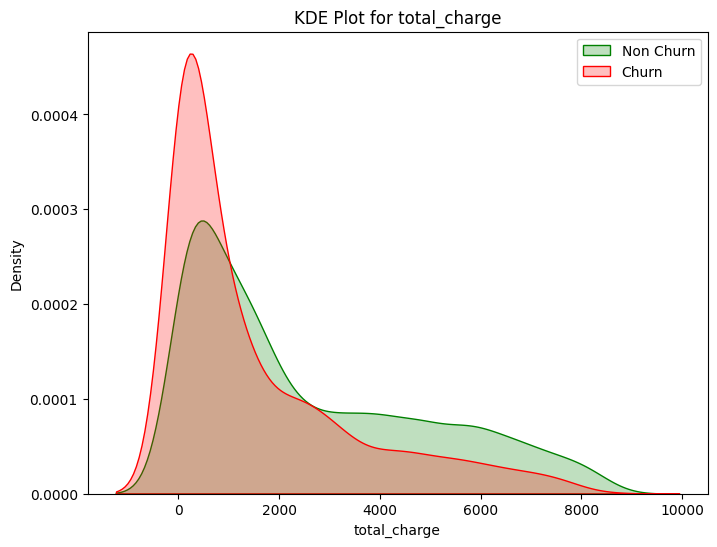

In [272]:
plt.figure(figsize=(8, 6))

# Plot KDE plot for data1
sns.kdeplot(data=df3['total_charge'], label='Non Churn', shade=True,color='g')

# Plot KDE plot for data2 on the same axis
sns.kdeplot(data=df4['total_charge'], label='Churn', shade=True, color ='r')

# Set title and legend
plt.title('KDE Plot for total_charge')
plt.legend()

# Show plot
plt.show()

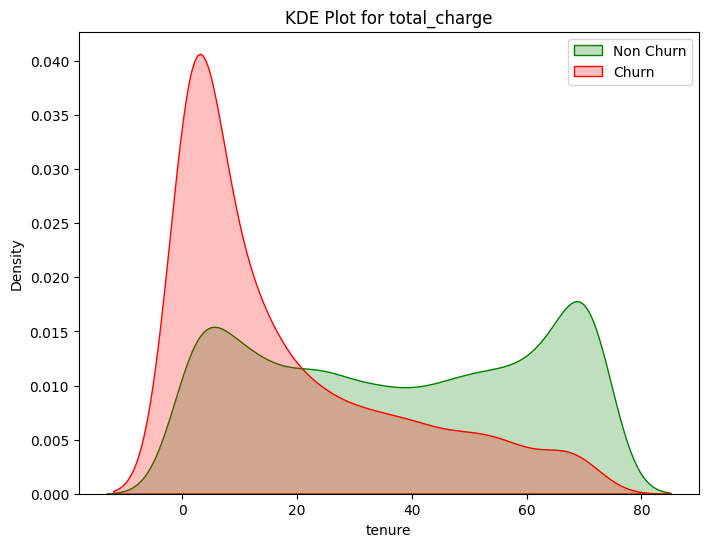

In [273]:
plt.figure(figsize=(8, 6))

# Plot KDE plot for data1
sns.kdeplot(data=df3['tenure'], label='Non Churn', shade=True,color='g')

# Plot KDE plot for data2 on the same axis
sns.kdeplot(data=df4['tenure'], label='Churn', shade=True, color ='r')

# Set title and legend
plt.title('KDE Plot for total_charge')
plt.legend()

# Show plot
plt.show()

lower tenure result to high rate of churn

from the three daigram we can conclude that the higher the monthly charge result to higrate of churn by the customer  combine this observation with the tenure and the total charge we notice that the higer the monthy charge, lower  tenure charge and lower total charge result to high rate of churn


Our analysis aimed to understand why customers leave and suggest ways to keep them. The churn rate, indicating the percentage of customers who stopped using our services within a set period.
the following observation was draw from the dataset
1. 84% of the customers are senior citizens, while 16% are not. Non-senior citizens are more likely to churn due to their higher percentage of churn.
2. Customers without partners are 33% more likely to churn compared to those with partners, who have a churn rate of 20%.
3. 70% of customers have no dependents, while 30% do. Customers without dependents are more likely to churn.
4. 90% of customers have phone service, while 9% do not. Customers with phone service are more likely to churn.
5. 48% of customers have no multiple lines, 40% have multiple lines, and 9% have no network service. Customers with no multiple lines are more likely to churn compared to those with alternative lines.
6. Customers with no online service are more likely to churn.
7. Customers with no device protection are more likely to churn, followed by those with device protection.
8. Customers with no tech support are likely to churn, with a percentage of 41% compared to those with tech support.
9. Customers with no streaming are likely to churn compared to those with no internet service.
10. Customers with no streaming movies are likely to churn, with a 33% chance of churning, followed by those with streaming movies.
12. Customers with one-month subscriptions are more likely to churn, followed by those with one-year contracts.
13. Customers who made payments through electronic checks are more likely to churn, followed by those who made payments through checks.
14. Tenure elongation from 0-10 is associated with a higher churn rate.
15. Monthly charges and total charges are positively correlated, indicating that an increase in monthly charges leads to an increase in total charges.
16. The churn rate is high when the monthly charges are very high, while the non-churn rate is high when the monthly charges are very low. Thus, higher monthly charges are associated with a higher chance of customer churn.
